## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [44]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [45]:
df = pd.read_csv('data/df_yeild.csv')

#### Show Top 5 Records

In [46]:
df.head()

,country,crop,avg_temp,pesticides_in_tones,average_rain_fall_mm_per_year,production
0,Albania,Maize,16.37,121.0,1485.0,91.5325
1,Albania,Maize,15.36,121.0,1485.0,72.6700
2,Albania,Maize,16.06,121.0,1485.0,62.1900
3,Albania,Maize,16.05,121.0,1485.0,60.4625
4,Albania,Maize,16.96,201.0,1485.0,64.6200


#### Preparing X and Y variables

In [47]:
X = df.drop(columns=['production'],axis=1)

In [48]:
X.head()

,country,crop,avg_temp,pesticides_in_tones,average_rain_fall_mm_per_year
0,Albania,Maize,16.37,121.0,1485.0
1,Albania,Maize,15.36,121.0,1485.0
2,Albania,Maize,16.06,121.0,1485.0
3,Albania,Maize,16.05,121.0,1485.0
4,Albania,Maize,16.96,201.0,1485.0


In [49]:
print("Categories in 'country' variable:     ",end=" " )
print(df['country'].unique())

print("Categories in 'crop' variable:  ",end=" ")
print(df['crop'].unique())


Categories in 'country' variable:      ['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Canada' 'Central African Republic' 'Chile' 'Colombia' 'Croatia'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea'
 'Estonia' 'Finland' 'France' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'India' 'Indonesia' 'Iraq'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Kazakhstan' 'Kenya' 'Latvia'
 'Lebanon' 'Lesotho' 'Libya' 'Lithuania' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Montenegro' 'Morocco'
 'Mozambique' 'Namibia' 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua'
 'Niger' 'Norway' 'Pakistan' 'Papua New Guinea' 'Peru' 'Poland' 'Portugal'
 'Qatar' 'Romania' 'Rwanda' 'Saudi Arabia' 'Senegal' 'Slovenia'
 'South Africa' 'Spain' 'Sri Lanka' 'Sudan' 'Surina

In [50]:
y = df['production']

In [51]:
y

0        91.5325
1        72.6700
2        62.1900
3        60.4625
4        64.6200
          ...   
13125    75.0000
13126    69.2025
13127    65.6850
13128    61.0500
13129    57.2200
Name: production, Length: 13130, dtype: float64

In [52]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [53]:
X = preprocessor.fit_transform(X)

In [54]:
X.shape

(13130, 114)

In [55]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((10504, 114), (2626, 114))

#### Create an Evaluate Function to give all metrics after model Training

In [56]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [57]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 103.7848
- Mean Absolute Error: 71.7692
- R2 Score: 0.7228
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 104.1362
- Mean Absolute Error: 71.9127
- R2 Score: 0.7303


Lasso
Model performance for Training set
- Root Mean Squared Error: 123.5750
- Mean Absolute Error: 77.3633
- R2 Score: 0.6069
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 124.4822
- Mean Absolute Error: 76.2842
- R2 Score: 0.6146


Ridge
Model performance for Training set
- Root Mean Squared Error: 103.9633
- Mean Absolute Error: 71.6902
- R2 Score: 0.7218
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 104.5456
- Mean Absolute Error: 72.0293
- R2 Score: 0.7282


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 41.8892
- Mean Absolute Error: 20.6785
- R2 Score: 0.9548
---

### Results

In [58]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.946825
7,CatBoosting Regressor,0.941151
6,XGBRegressor,0.940708
3,K-Neighbors Regressor,0.937443
4,Decision Tree,0.919919
0,Linear Regression,0.730281
2,Ridge,0.728156
1,Lasso,0.614589
8,AdaBoost Regressor,0.524182


## Linear Regression

In [59]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 73.03


## Plot y_pred and y_test

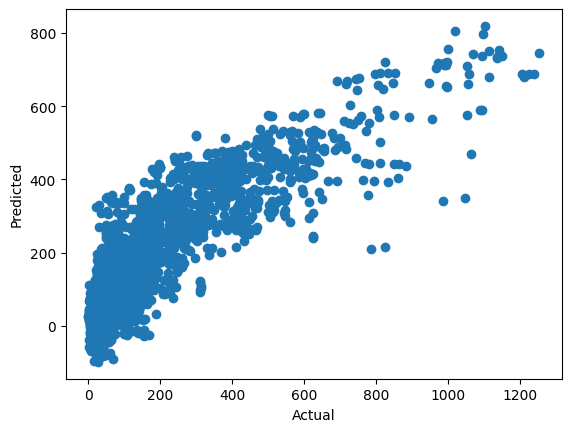

In [60]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

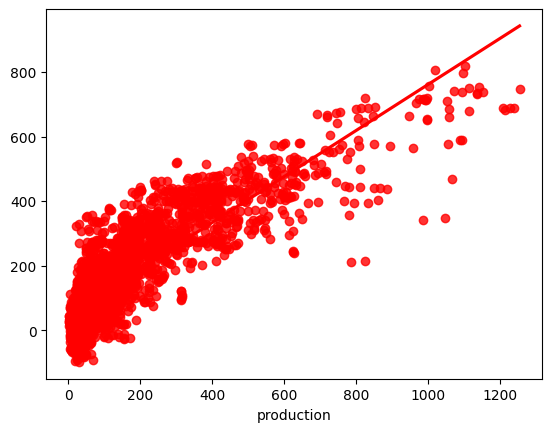

In [61]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [62]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
4320,56.8375,52.499852,4.337648
2236,87.5000,21.785049,65.714951
3578,141.9075,213.286874,-71.379374
9928,95.6250,69.944971,25.680029
5762,308.3075,303.355680,4.951820
...,...,...,...
12588,200.1875,430.550902,-230.363402
5434,13.6125,-7.432584,21.045084
8440,595.2250,454.771929,140.453071
5748,69.0525,93.263655,-24.211155
